## Análise Exploratória
Nesta etapa, exploraremos as relações entre as variáveis de saúde e orçamento.

    ano sigla_uf     cob_ab    cob_acs    cob_esf  cob_vac_bcg  cob_vac_rota  \
0  2010       AC  75.558215  87.753425  64.064896        100.0     66.749718   
1  2010       AL  78.580644  77.051768  72.961540        100.0     74.794916   
2  2010       AM  65.216161  69.136690  50.478242        100.0     58.681194   
3  2010       AP  90.042754  89.235233  73.277913        100.0     73.531058   
4  2010       BA  66.063220  82.518806  59.840187        100.0     72.142332   

   cob_vac_menin  cob_vac_pneumo  cob_vac_polio  ...  desp_recp_saude_pc_mun  \
0       0.652842        4.864448     100.000000  ...              114.166340   
1       3.434813        6.652844     100.000000  ...              124.854673   
2       2.051782        7.585714      92.480398  ...              163.538580   
3       0.395436        4.546726      90.752658  ...              111.239863   
4      64.723803        2.831480      95.929891  ...              120.605392   

   pct_desp_recp_saude_uf  desp_tot_sa

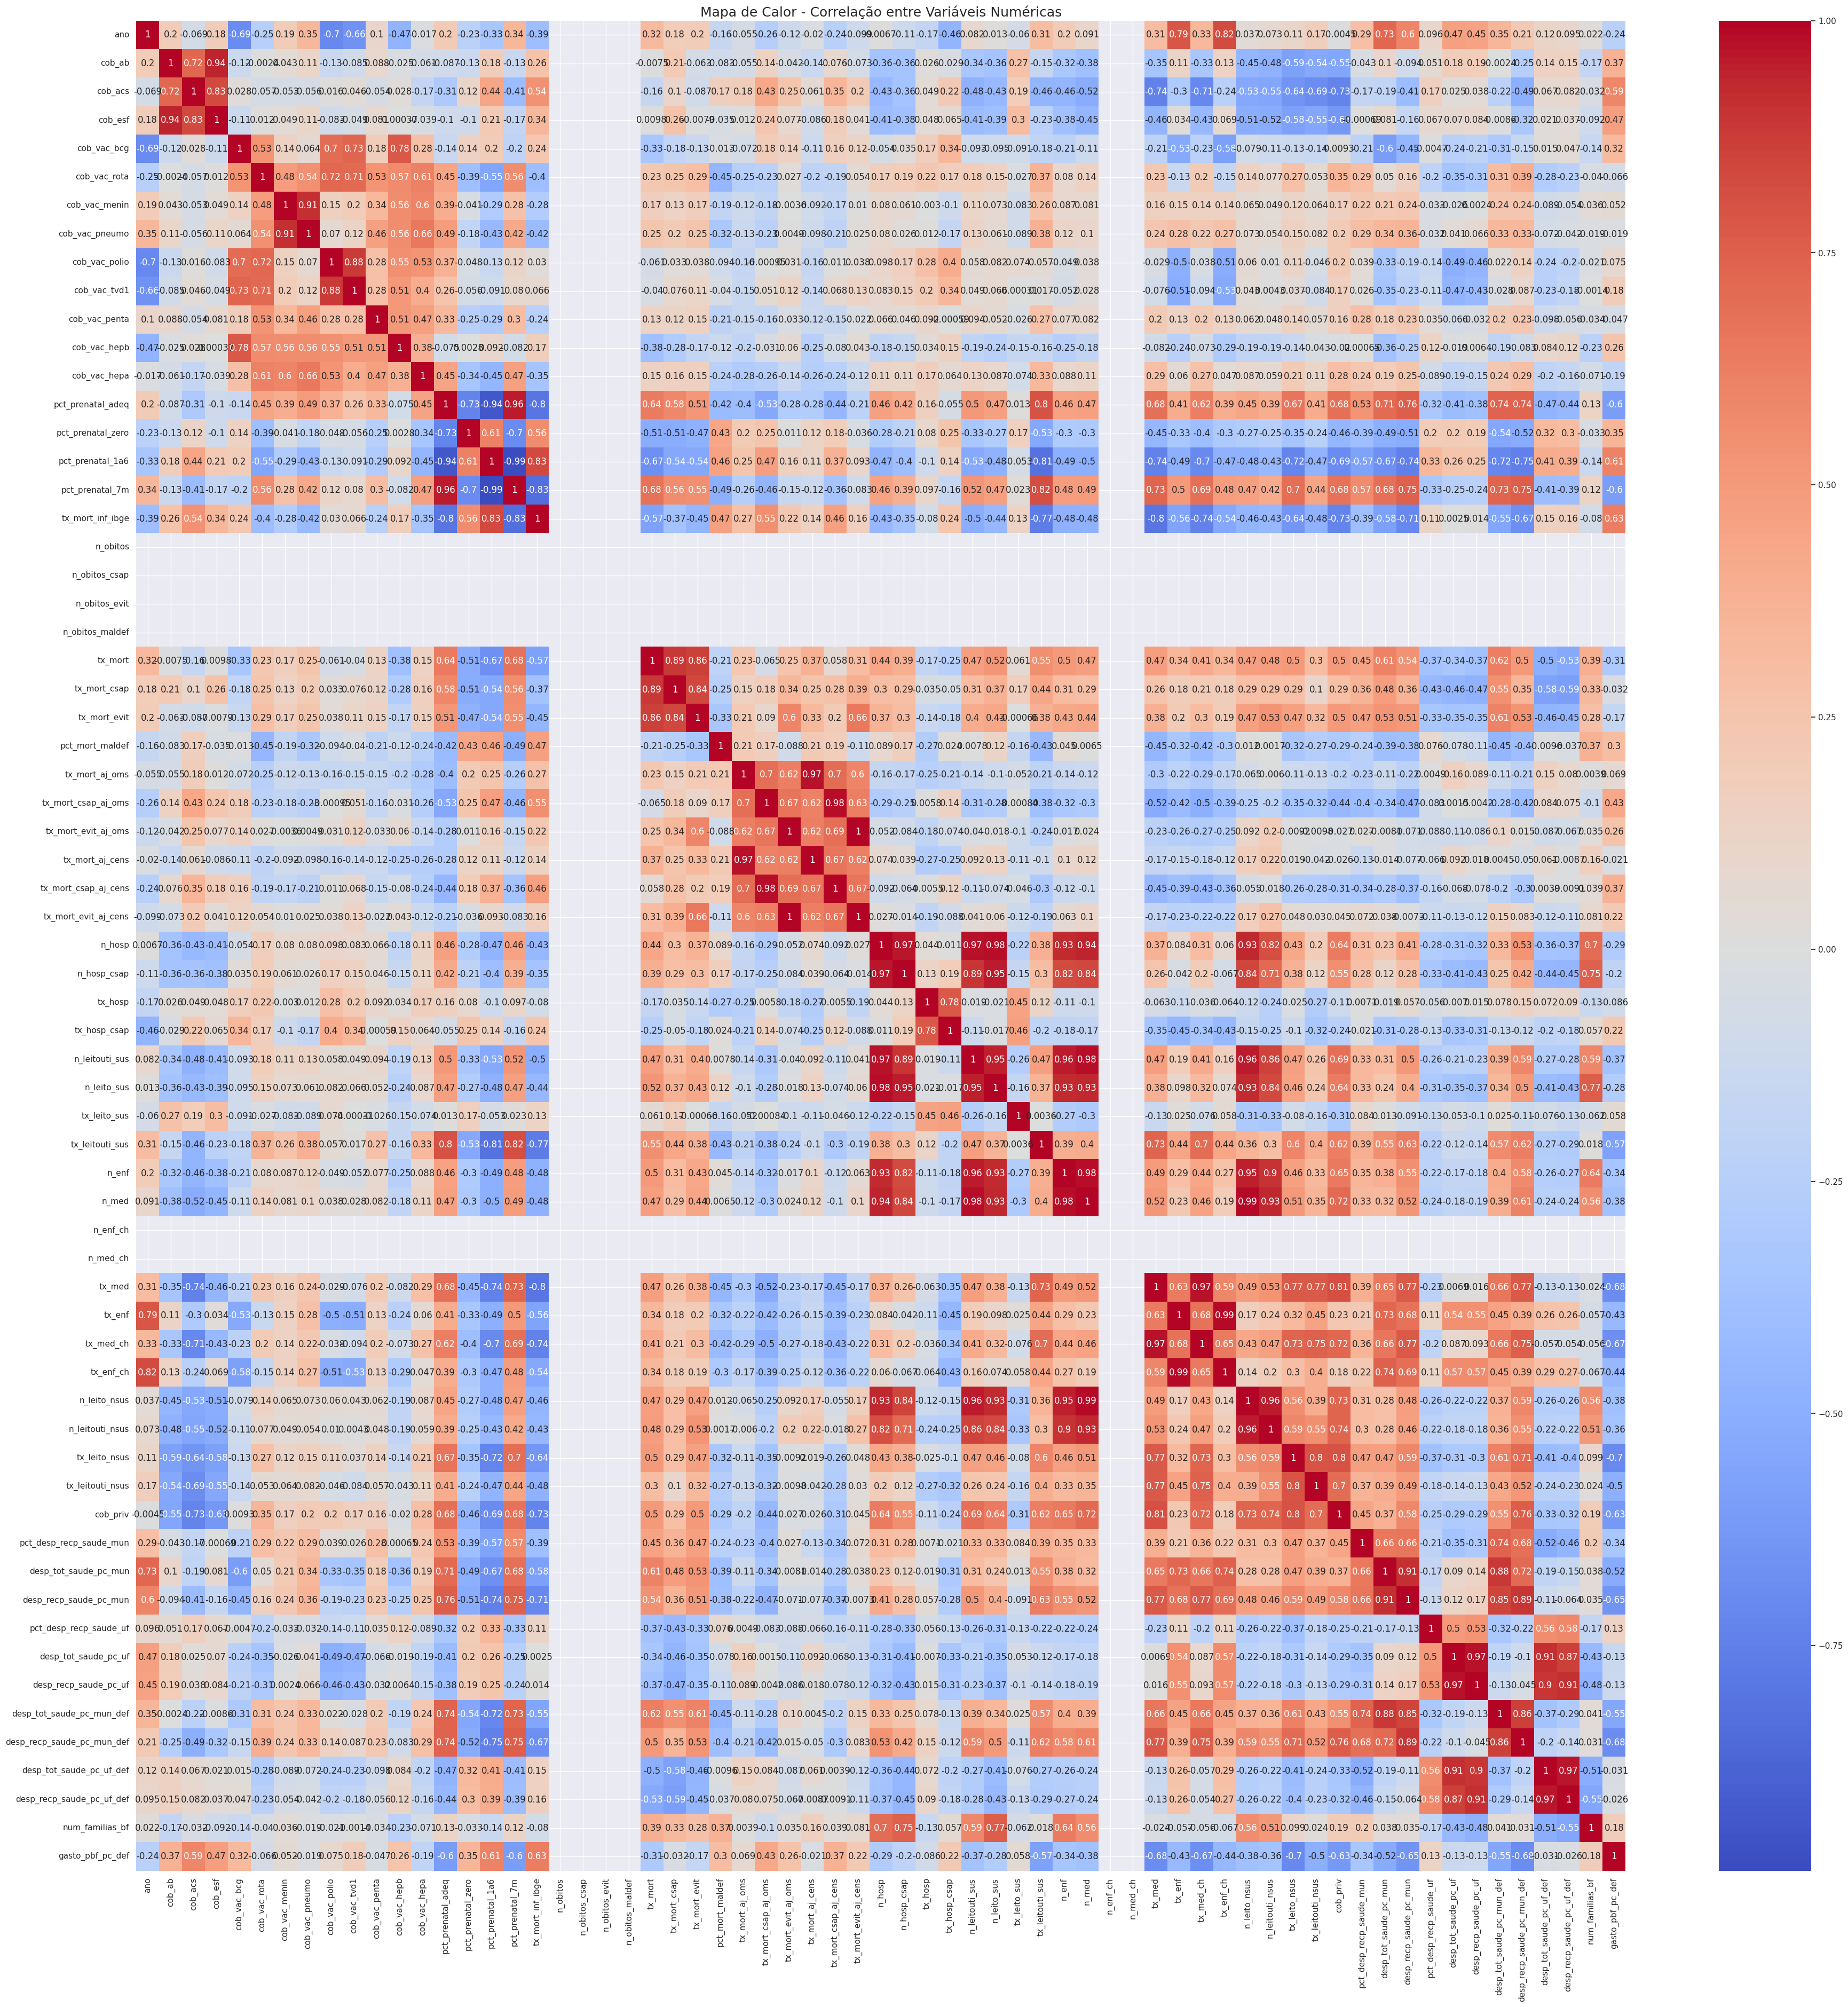

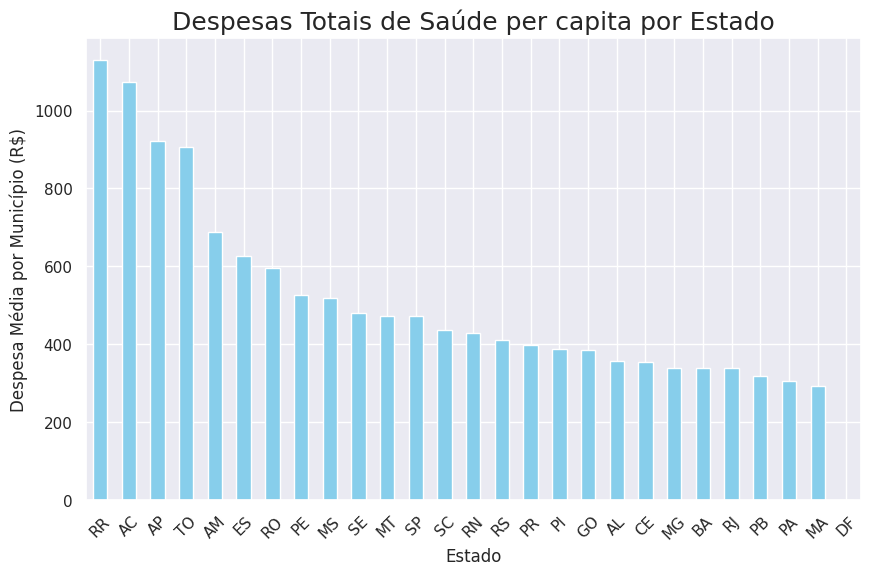

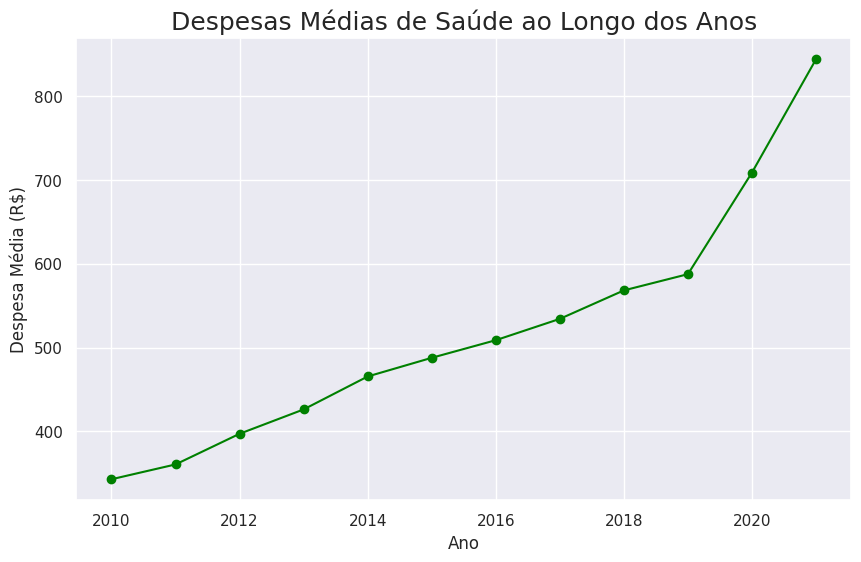

In [57]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Configurações de exibição
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['axes.titlesize'] = 18

# Carregar o dataset
dataset_path = '../datasets/br_ieps_saude_uf.csv'
saude = pd.read_csv(dataset_path)

# Visualizar as primeiras linhas do dataset
print(saude.head())

# Informações gerais sobre o dataset
print(saude.info())

# Estatísticas descritivas
print(saude.describe())

# Selecionar apenas colunas numéricas
colunas_numericas = saude.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação entre variáveis numéricas
correlacao = colunas_numericas.corr()

plt.figure(figsize=(45, 45))
sns.heatmap(correlacao, cmap='coolwarm', annot=True, cbar=True)
plt.title("Mapa de Calor - Correlação entre Variáveis Numéricas")
plt.show()


# Análise de despesas totais de saúde por estado
despesas_estado = saude.groupby('sigla_uf')['desp_tot_saude_pc_uf'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
despesas_estado.plot(kind='bar', color='skyblue')
plt.title('Despesas Totais de Saúde per capita por Estado')
plt.ylabel('Despesa Média por Município (R$)')
plt.xlabel('Estado')
plt.xticks(rotation=45)
plt.show()

# Análise temporal de despesas (supondo que há uma coluna "ano")
if 'ano' in saude.columns:
    despesas_ano = saude.groupby('ano')['desp_tot_saude_pc_uf'].mean()

    plt.figure(figsize=(10, 6))
    despesas_ano.plot(kind='line', marker='o', color='green')
    plt.title('Despesas Médias de Saúde ao Longo dos Anos')
    plt.ylabel('Despesa Média (R$)')
    plt.xlabel('Ano')
    plt.grid(True)
    plt.show()

# Análise por categoria de gasto (exemplo genérico; ajuste com base no dataset)
if 'categoria_gasto' in saude.columns:
    gastos_categoria = saude.groupby('categoria_gasto')['desp_tot_saude_pc_uf'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=gastos_categoria.index, y=gastos_categoria.values, palette='viridis')
    plt.title('Média de Gastos por Categoria')
    plt.ylabel('Despesa Média (R$)')
    plt.xlabel('Categoria de Gasto')
    plt.xticks(rotation=45)
    plt.show()


## Municípios com maior gasto em saúde per capita apresentam maior cobertura de Estratégia de Saúde da Família (cob_esf)?

Valores ausentes:
desp_tot_saude_pc_mun    12
cob_esf                   0
dtype: int64


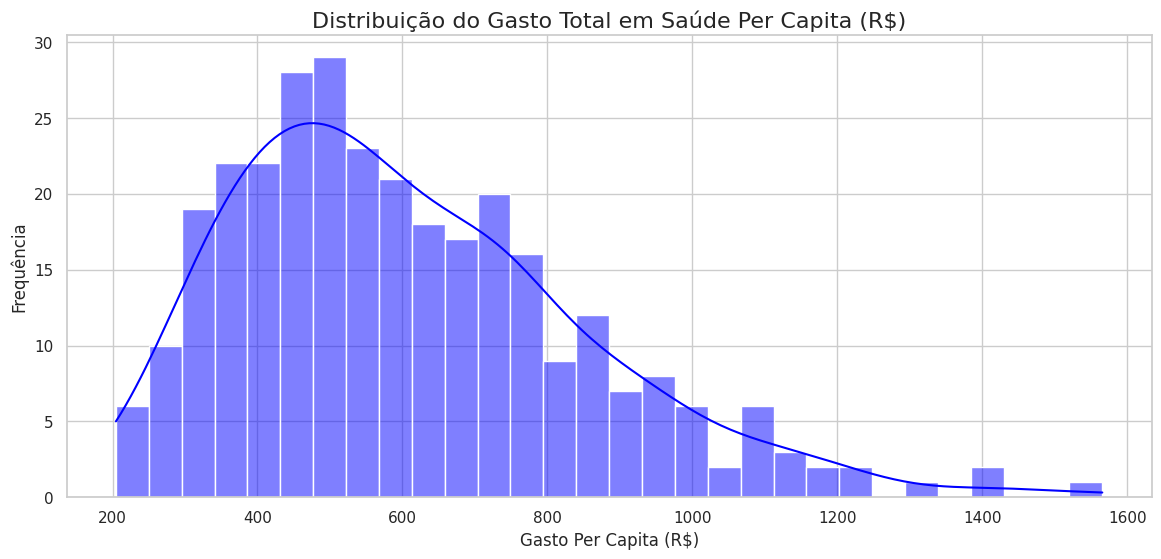

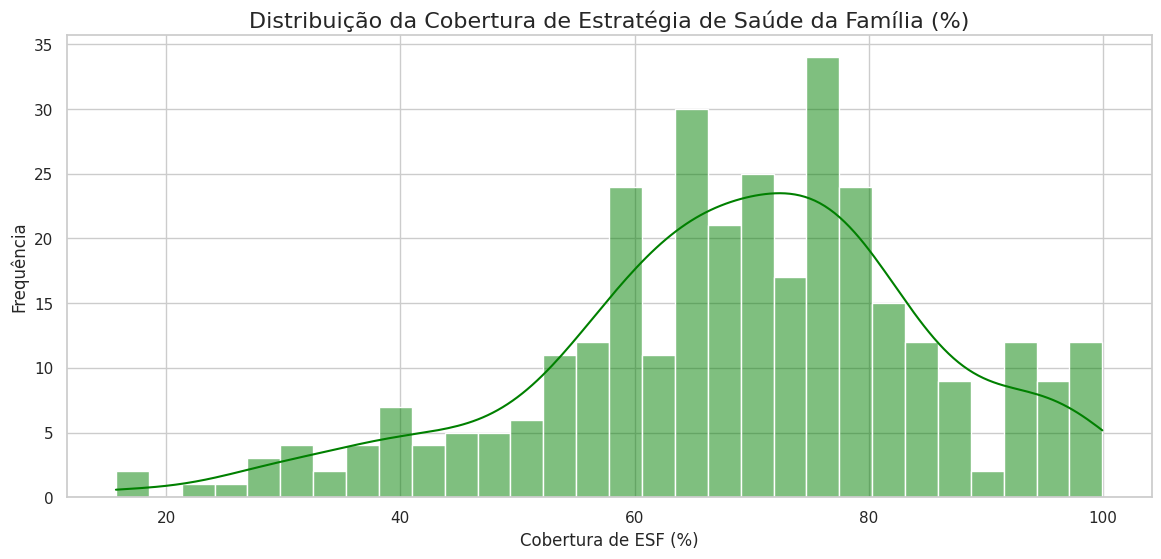

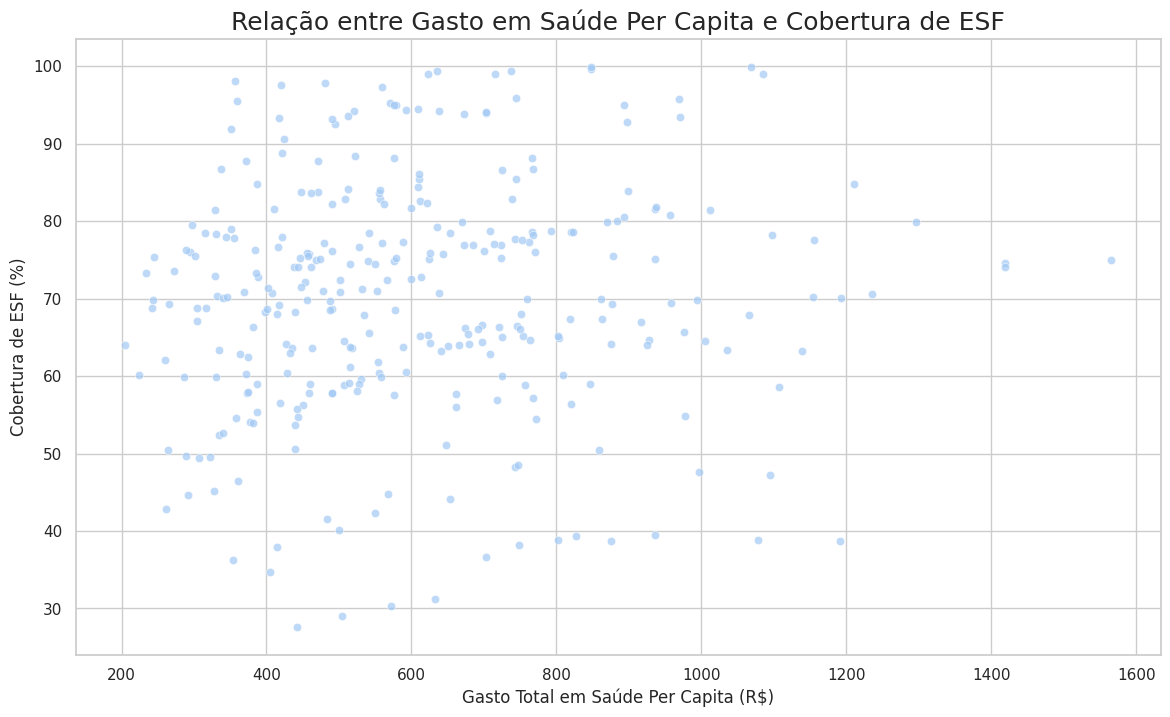

Correlação entre Gasto em Saúde Per Capita e Cobertura de ESF:
                       desp_tot_saude_pc_mun   cob_esf
desp_tot_saude_pc_mun               1.000000  0.080896
cob_esf                             0.080896  1.000000


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de exibição
sns.set(style='whitegrid', palette='pastel')

# Filtrar apenas colunas de interesse
dados_analise = saude[['desp_tot_saude_pc_mun', 'cob_esf']]

# Verificar valores ausentes
print("Valores ausentes:")
print(dados_analise.isnull().sum())

# Distribuição das variáveis
plt.figure(figsize=(14, 6))
sns.histplot(dados_analise['desp_tot_saude_pc_mun'], kde=True, bins=30, color='blue')
plt.title('Distribuição do Gasto Total em Saúde Per Capita (R$)', fontsize=16)
plt.xlabel('Gasto Per Capita (R$)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(dados_analise['cob_esf'], kde=True, bins=30, color='green')
plt.title('Distribuição da Cobertura de Estratégia de Saúde da Família (%)', fontsize=16)
plt.xlabel('Cobertura de ESF (%)')
plt.ylabel('Frequência')
plt.show()

# Relação entre as variáveis
plt.figure(figsize=(14, 8))
sns.scatterplot(x='desp_tot_saude_pc_mun', y='cob_esf', data=dados_analise, alpha=0.7)
plt.title('Relação entre Gasto em Saúde Per Capita e Cobertura de ESF', fontsize=18)
plt.xlabel('Gasto Total em Saúde Per Capita (R$)')
plt.ylabel('Cobertura de ESF (%)')
plt.grid(True)
plt.show()

# Calcular correlação
correlacao = dados_analise.corr()
print("Correlação entre Gasto em Saúde Per Capita e Cobertura de ESF:")
print(correlacao)


Embora o gasto em saúde per capita possa refletir maior investimento em infraestrutura ou serviços de saúde, ele não apresenta uma relação significativa com a cobertura da Estratégia de Saúde da Família (ESF), conforme indicado pela baixa correlação (0.08). Isso sugere que aumentar o orçamento per capita não garante, por si só, uma maior cobertura da ESF. Fatores como a eficiência na aplicação dos recursos, as prioridades locais de saúde, limitações logísticas ou estruturais, e a capacidade de expansão dos serviços de saúde desempenham um papel mais relevante. Para ampliar a cobertura da ESF, é necessário focar em estratégias específicas de gestão e planejamento regional que vão além do simples aumento de gastos.

## Existe uma diferença significativa na cobertura de agentes comunitários de saúde (cob_acs) em municípios com maior despesa própria municipal em saúde (desp_recp_saude_pc_mun)?

Valores únicos por coluna:
desp_tot_saude_pc_mun     312
tx_mort_inf_ibge          297
cob_acs                   324
desp_recp_saude_pc_mun    312
dtype: int64

Verificar valores ausentes:
desp_tot_saude_pc_mun     12
tx_mort_inf_ibge          27
cob_acs                    0
desp_recp_saude_pc_mun    12
dtype: int64


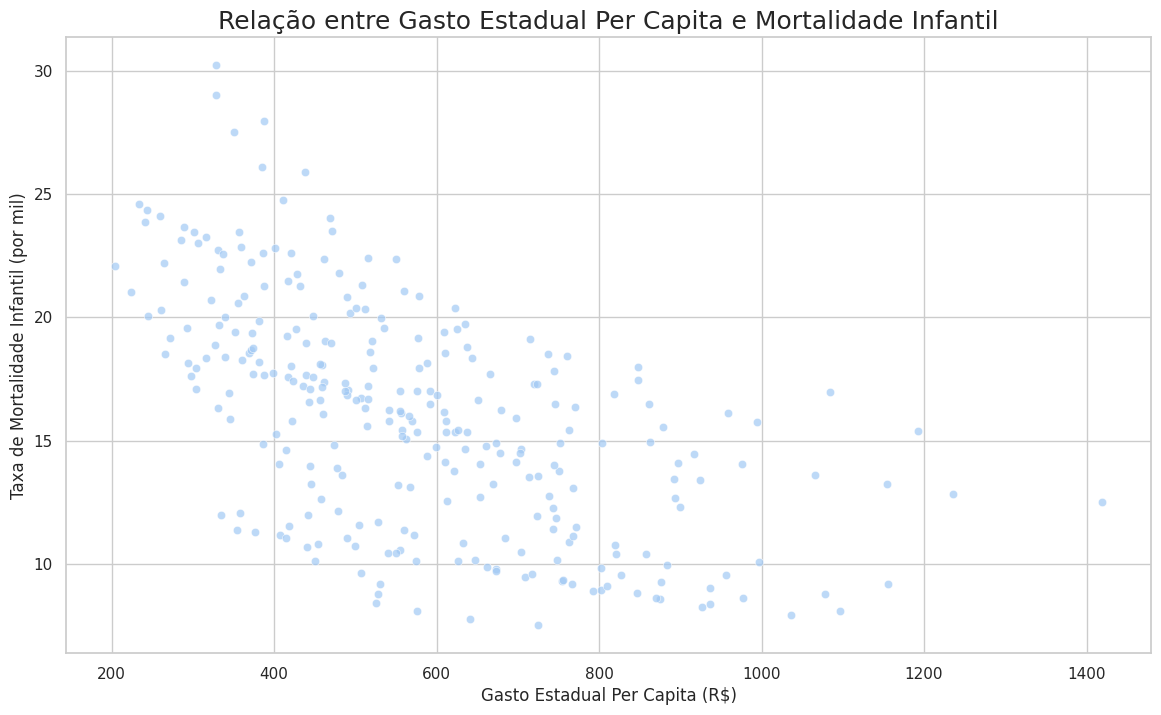

/tmp/ipykernel_378902/665151980.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(baixo_gasto['cob_acs'], label='Baixo Gasto', shade=True, color='blue')
/tmp/ipykernel_378902/665151980.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alto_gasto['cob_acs'], label='Alto Gasto', shade=True, color='red')


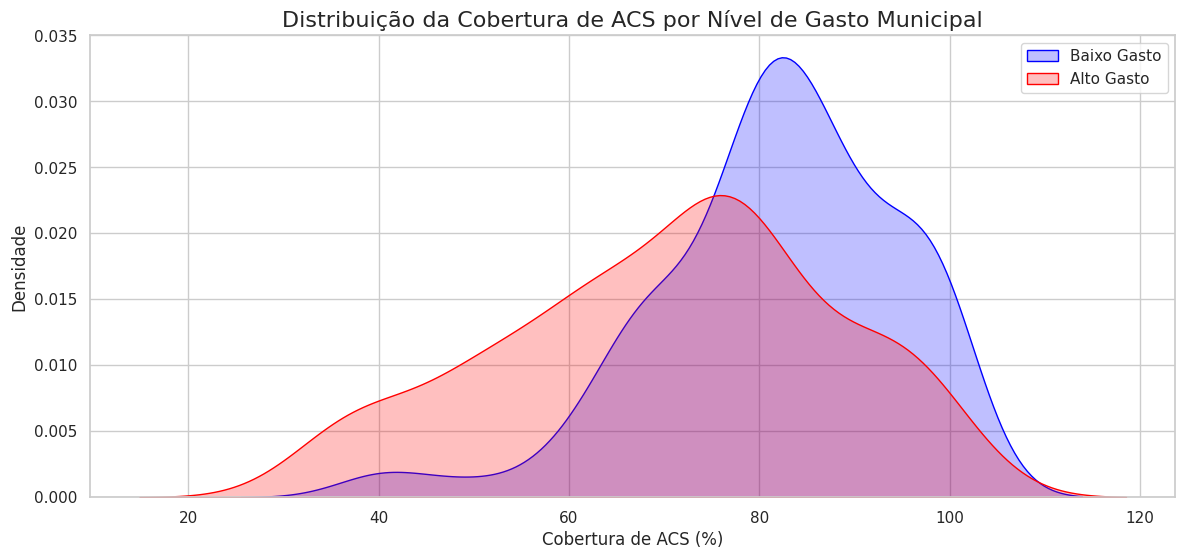

In [59]:
# Verificar colunas e identificar valores únicos ou ausentes
print("Valores únicos por coluna:")
print(saude[['desp_tot_saude_pc_mun', 'tx_mort_inf_ibge', 'cob_acs', 'desp_recp_saude_pc_mun']].nunique())

print("\nVerificar valores ausentes:")
print(saude[['desp_tot_saude_pc_mun', 'tx_mort_inf_ibge', 'cob_acs', 'desp_recp_saude_pc_mun']].isnull().sum())

# Remover linhas com valores ausentes
dados_analise = saude[['desp_tot_saude_pc_mun', 'tx_mort_inf_ibge']].dropna()

# Verificar novamente se há variação nos dados
if dados_analise['desp_tot_saude_pc_mun'].nunique() > 1 and dados_analise['tx_mort_inf_ibge'].nunique() > 1:
    # Relação entre as variáveis
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='desp_tot_saude_pc_mun', y='tx_mort_inf_ibge', data=dados_analise, alpha=0.7)
    plt.title('Relação entre Gasto Estadual Per Capita e Mortalidade Infantil', fontsize=18)
    plt.xlabel('Gasto Estadual Per Capita (R$)')
    plt.ylabel('Taxa de Mortalidade Infantil (por mil)')
    plt.grid(True)
    plt.show()
else:
    print("Os dados não possuem variação suficiente para criar o gráfico.")

# Verificar dados para análise da cobertura de ACS
dados_cob_acs = saude[['desp_recp_saude_pc_mun', 'cob_acs']].dropna()

if dados_cob_acs['desp_recp_saude_pc_mun'].nunique() > 1 and dados_cob_acs['cob_acs'].nunique() > 1:
    # Divisão entre alto e baixo gasto
    mediana_gasto = dados_cob_acs['desp_recp_saude_pc_mun'].median()
    baixo_gasto = dados_cob_acs[dados_cob_acs['desp_recp_saude_pc_mun'] <= mediana_gasto]
    alto_gasto = dados_cob_acs[dados_cob_acs['desp_recp_saude_pc_mun'] > mediana_gasto]

    # Comparar distribuições
    plt.figure(figsize=(14, 6))
    sns.kdeplot(baixo_gasto['cob_acs'], label='Baixo Gasto', shade=True, color='blue')
    sns.kdeplot(alto_gasto['cob_acs'], label='Alto Gasto', shade=True, color='red')
    plt.title('Distribuição da Cobertura de ACS por Nível de Gasto Municipal', fontsize=16)
    plt.xlabel('Cobertura de ACS (%)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()
else:
    print("Os dados de cobertura de ACS e gasto municipal não possuem variação suficiente para análise.")


Existe uma diferença significativa na cobertura de ACS entre municípios com maior e menor despesa própria em saúde. Municípios com maior gasto apresentam, em média, uma cobertura maior de ACS, como indicado pela curva de densidade deslocada para a direita (maiores porcentagens de cobertura) em relação aos municípios com menor gasto, cuja curva está mais concentrada em valores mais baixos de cobertura.

Isso sugere que um maior investimento municipal em saúde está associado a uma maior capacidade de expandir a cobertura de ACS, possivelmente devido ao maior financiamento para contratar agentes comunitários e implementar estratégias de atenção primária mais abrangentes.


## Municípios com maior despesa per capita em saúde municipal (desp_tot_saude_pc_mun) possuem maior número de médicos por 1.000 habitantes (tx_med)?

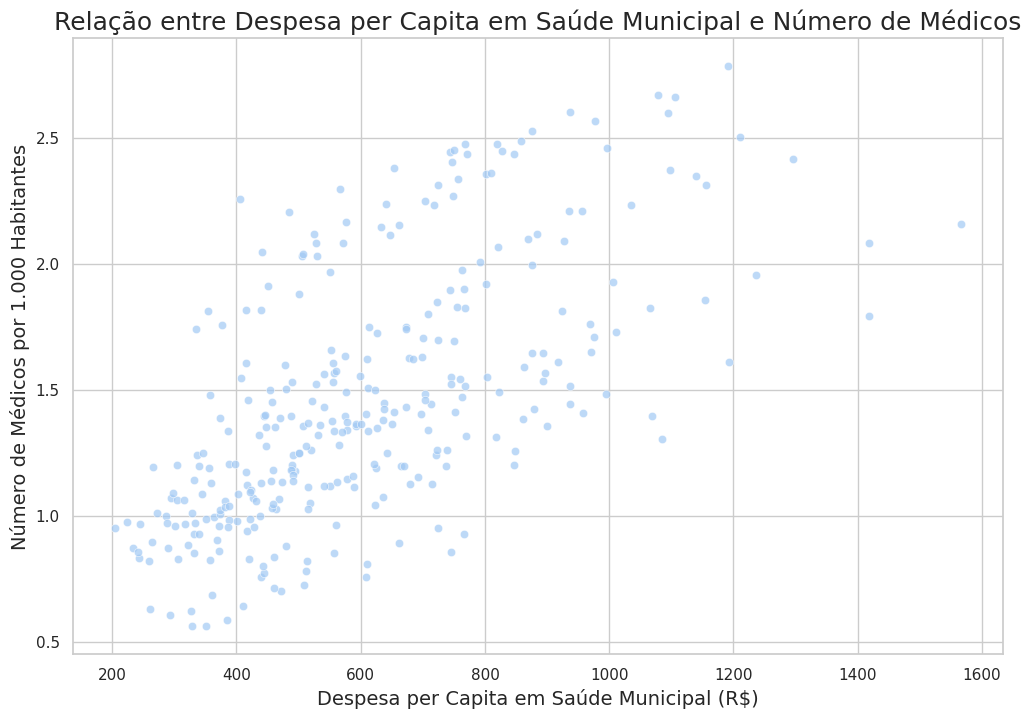

Correlação entre despesa per capita e número de médicos: 0.65


In [60]:
# Analisar a relação entre despesa per capita em saúde municipal e número de médicos por 1.000 habitantes
plt.figure(figsize=(12, 8))
sns.scatterplot(x=saude['desp_tot_saude_pc_mun'], y=saude['tx_med'], alpha=0.7)

# Adicionar título e rótulos
plt.title('Relação entre Despesa per Capita em Saúde Municipal e Número de Médicos', fontsize=18)
plt.xlabel('Despesa per Capita em Saúde Municipal (R$)', fontsize=14)
plt.ylabel('Número de Médicos por 1.000 Habitantes', fontsize=14)
plt.grid(True)

# Exibir gráfico
plt.show()

# Calcular correlação
correlacao = saude[['desp_tot_saude_pc_mun', 'tx_med']].corr().iloc[0, 1]
print(f"Correlação entre despesa per capita e número de médicos: {correlacao:.2f}")

A partir do gráfico apresentado, pode-se observar uma correlação moderada positiva (correlação = 0.65) entre a despesa per capita em saúde municipal (R$) e o número de médicos por 1.000 habitantes. Isso significa que, em geral, municípios que gastam mais em saúde por habitante tendem a ter um maior número de médicos por 1.000 habitantes.

## Municípios com maior gasto em saúde per capita possuem maior cobertura vacinal?

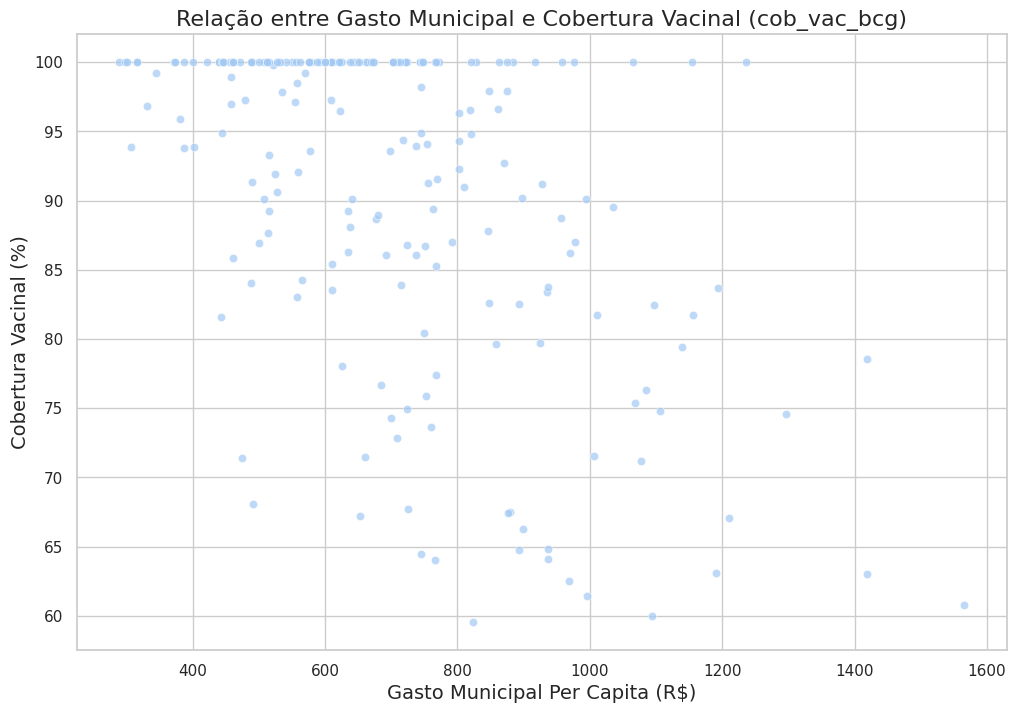

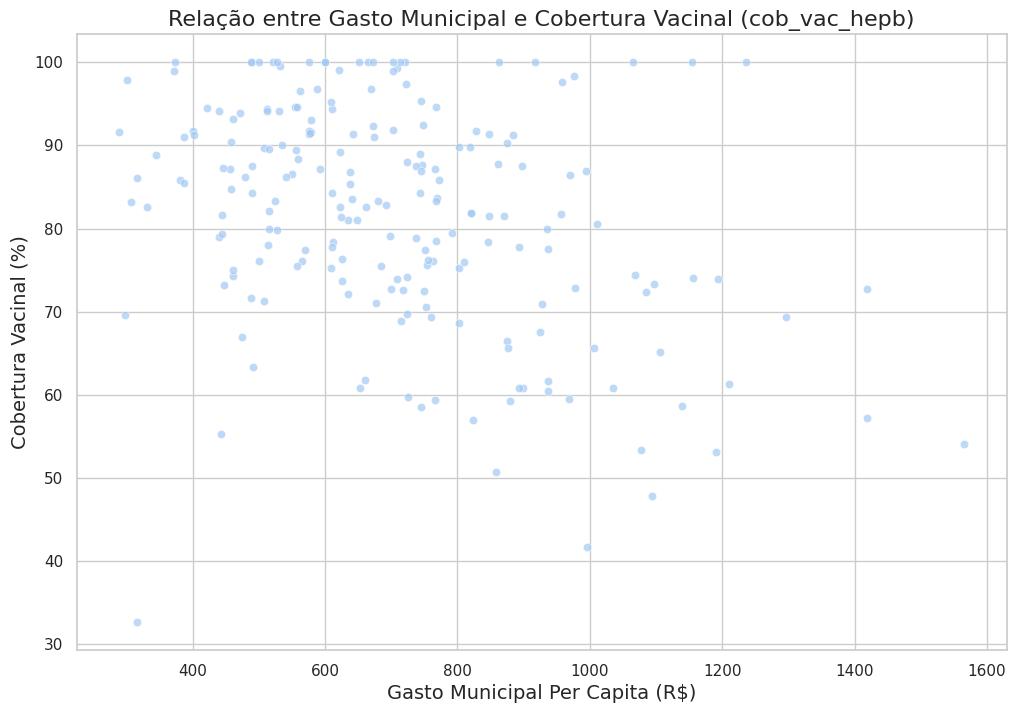

Correlação entre gasto municipal e cobertura vacinal (cob_vac_bcg): -0.52
Correlação entre gasto municipal e cobertura vacinal (cob_vac_hepb): -0.36


In [61]:
# Selecionar vacinas e gastos municipais
dados_vacinas = saude[['desp_tot_saude_pc_mun', 'cob_vac_bcg', 'cob_vac_hepb']].dropna()

# Criar gráficos para cada vacina
vacinas = ['cob_vac_bcg', 'cob_vac_hepb']
for vacina in vacinas:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='desp_tot_saude_pc_mun', y=vacina, data=dados_vacinas, alpha=0.7)
    plt.title(f'Relação entre Gasto Municipal e Cobertura Vacinal ({vacina})', fontsize=16)
    plt.xlabel('Gasto Municipal Per Capita (R$)', fontsize=14)
    plt.ylabel('Cobertura Vacinal (%)', fontsize=14)
    plt.grid(True)
    plt.show()

# Calcular correlação para cada vacina
for vacina in vacinas:
    correlacao_vacina = dados_vacinas[['desp_tot_saude_pc_mun', vacina]].corr().iloc[0, 1]
    print(f"Correlação entre gasto municipal e cobertura vacinal ({vacina}): {correlacao_vacina:.2f}")


A análise do gráfico indica que não há uma correlação direta significativa entre o gasto municipal per capita em saúde e a cobertura vacinal de BCG. A cobertura vacinal parece ser alta na maior parte dos municípios, independentemente do nível de gasto per capita. Isso sugere que a cobertura de BCG pode ser influenciada por outros fatores, como políticas nacionais de imunização, infraestrutura básica de saúde ou campanhas de vacinação.